In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from softmax_reg import SoftmaxRegression

In [2]:
data = np.load("cefr_data.npz")

X_train_std = data["X_train_std"]      # (N_train, 10)
y_train = data["y_train"]              # (N_train,) labels 0,1,...,4
X_test_std = data["X_test_std"]        # (N_test, 10)
y_test = data["y_test"]                # (N_test,) labels 0,1,...,4
feature_means = data["feature_means"]  # (10,)
feature_stds = data["feature_stds"]    # (10,)

In [3]:
np.random.seed(0) #reproducibility

In [4]:
# hyperparameter grid
learning_rates = [0.001, 0.01, 0.05, 0.1]
reg_lambdas    = [0.0, 1e-5, 1e-4, 1e-3, 1e-2]
epoch_list     = [50, 100, 200]

In [5]:
results = []

n_features = X_train_std.shape[1]
n_classes = 5 

for lr in learning_rates:
    for lam in reg_lambdas:
        for epochs in epoch_list:
            print(f"Training with lr={lr}, reg_lambda={lam}, num_epochs={epochs}...")

            model = SoftmaxRegression(
                n_features=n_features,
                n_classes=n_classes,
                learning_rate=lr,
                num_epochs=epochs,
                reg_lambda=lam,
            )

            model.fit(X_train_std, y_train)

            train_acc = model.score(X_train_std, y_train)
            test_acc  = model.score(X_test_std, y_test)
            final_loss = model.loss_history[-1] if len(model.loss_history) > 0 else np.nan

            print(f"  -> train_acc={train_acc:.4f}, test_acc={test_acc:.4f}, final_loss={final_loss:.4f}")

            results.append({
                "learning_rate": lr,
                "reg_lambda": lam,
                "num_epochs": epochs,
                "train_acc": train_acc,
                "test_acc": test_acc,
                "final_loss": final_loss,
            })

results_df = pd.DataFrame(results)
print("\nTop of results table:")
print(results_df.head())

results_df.to_csv("softmax_hparam_search.csv", index=False)
print("\nSaved results to softmax_hparam_search.csv")

Training with lr=0.001, reg_lambda=0.0, num_epochs=50...
  -> train_acc=0.5383, test_acc=0.5396, final_loss=1.5769
Training with lr=0.001, reg_lambda=0.0, num_epochs=100...
  -> train_acc=0.6216, test_acc=0.6228, final_loss=1.5679
Training with lr=0.001, reg_lambda=0.0, num_epochs=200...
  -> train_acc=0.5646, test_acc=0.5657, final_loss=1.5342
Training with lr=0.001, reg_lambda=1e-05, num_epochs=50...
  -> train_acc=0.4219, test_acc=0.4235, final_loss=1.5894
Training with lr=0.001, reg_lambda=1e-05, num_epochs=100...
  -> train_acc=0.6063, test_acc=0.6062, final_loss=1.5586
Training with lr=0.001, reg_lambda=1e-05, num_epochs=200...
  -> train_acc=0.6221, test_acc=0.6233, final_loss=1.5241
Training with lr=0.001, reg_lambda=0.0001, num_epochs=50...
  -> train_acc=0.4805, test_acc=0.4813, final_loss=1.5826
Training with lr=0.001, reg_lambda=0.0001, num_epochs=100...
  -> train_acc=0.5687, test_acc=0.5699, final_loss=1.5614
Training with lr=0.001, reg_lambda=0.0001, num_epochs=200...
  


Configs with num_epochs = 50:
    learning_rate  reg_lambda  num_epochs  train_acc  test_acc  final_loss
51            0.1     0.00010          50   0.653714  0.651961    0.941476
48            0.1     0.00001          50   0.653754  0.651914    0.941850
54            0.1     0.00100          50   0.653635  0.651804    0.942316
45            0.1     0.00000          50   0.653466  0.651709    0.942567
57            0.1     0.01000          50   0.653277  0.651441    0.953454


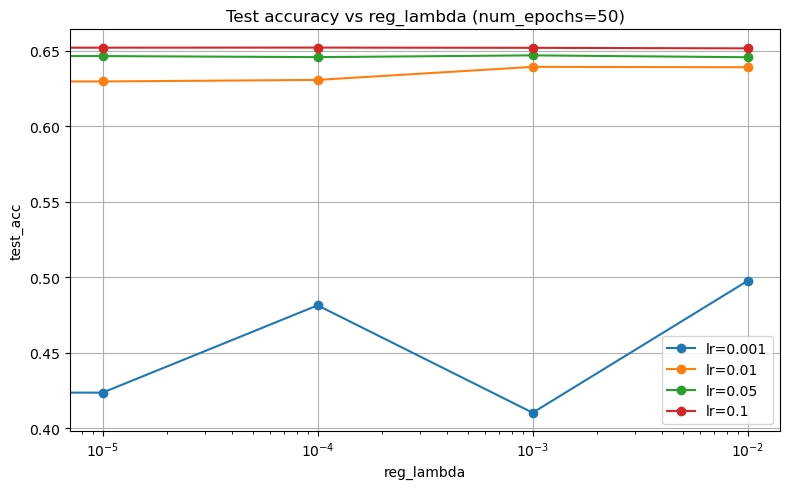


Configs with num_epochs = 100:
    learning_rate  reg_lambda  num_epochs  train_acc  test_acc  final_loss
46            0.1     0.00000         100   0.666367  0.665437    0.854736
52            0.1     0.00010         100   0.666198  0.665422    0.855334
55            0.1     0.00100         100   0.666080  0.664933    0.856737
49            0.1     0.00001         100   0.665918  0.664854    0.855455
58            0.1     0.01000         100   0.664637  0.663593    0.873713


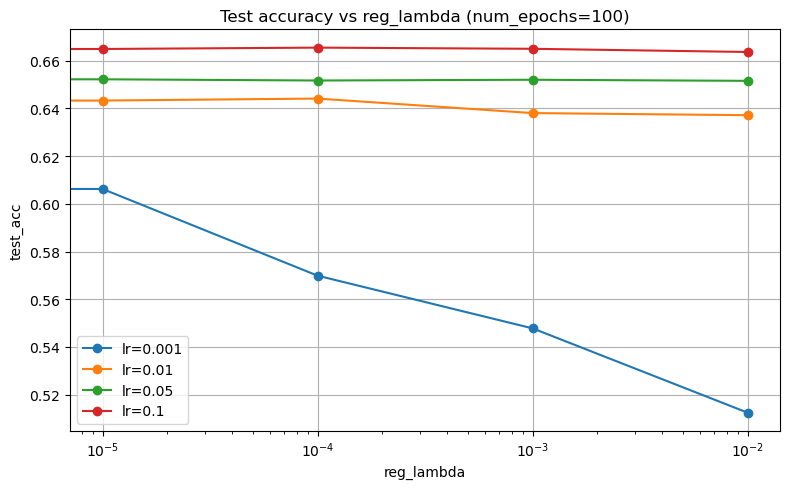


Configs with num_epochs = 200:
    learning_rate  reg_lambda  num_epochs  train_acc  test_acc  final_loss
47            0.1     0.00000         200   0.685262  0.684366    0.792144
50            0.1     0.00001         200   0.685282  0.684099    0.791991
53            0.1     0.00010         200   0.685144  0.684083    0.792596
56            0.1     0.00100         200   0.684982  0.683831    0.794894
59            0.1     0.01000         200   0.681231  0.679591    0.821156


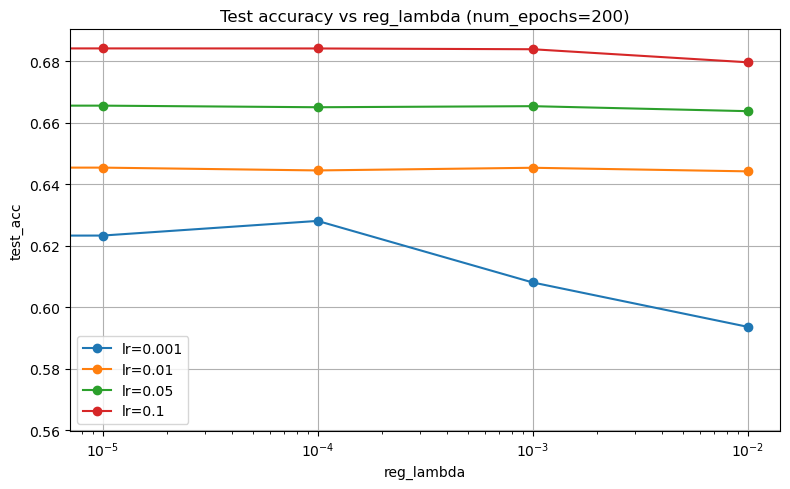

In [7]:
unique_epochs = sorted(results_df["num_epochs"].unique())

for target_epochs in unique_epochs:
    subset = results_df[results_df["num_epochs"] == target_epochs]

    print(f"\nConfigs with num_epochs = {target_epochs}:")
    print(subset.sort_values("test_acc", ascending=False).head())

    plt.figure(figsize=(8, 5))

    for lr in sorted(subset["learning_rate"].unique()):
        sub_lr = subset[subset["learning_rate"] == lr].copy()
        sub_lr = sub_lr.sort_values("reg_lambda")

        plt.plot(
            sub_lr["reg_lambda"],
            sub_lr["test_acc"],
            marker="o",
            label=f"lr={lr}",
        )

    plt.xscale("log")
    plt.xlabel("reg_lambda")
    plt.ylabel("test_acc")
    plt.title(f"Test accuracy vs reg_lambda (num_epochs={target_epochs})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [8]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=200,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.681089004740457
Test  accuracy: 0.6792756158683626


In [11]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=300,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.6888794316180208
Test  accuracy: 0.6877708953930052


In [12]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=400,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.6929815228570415
Test  accuracy: 0.6916008637130203


In [13]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=500,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.6957044287611369
Test  accuracy: 0.6944693996564061


In [14]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=600,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.697686515113901
Test  accuracy: 0.6959824735606096


In [15]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=700,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.6989829493287308
Test  accuracy: 0.6976373981433323


In [16]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=800,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.7001257028919546
Test  accuracy: 0.6987249200119785


In [17]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=900,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.7010832515673456
Test  accuracy: 0.6995129793370845


In [18]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=1000,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.7018752980025456
Test  accuracy: 0.700379844594701


In [19]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=1100,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.7024427342546291
Test  accuracy: 0.7011048591737986


In [20]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=1200,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.7028249656188799
Test  accuracy: 0.7015934559553643


In [21]:
model = SoftmaxRegression(
    n_features=n_features,
    n_classes=n_classes,
    learning_rate=0.1,   # you can tune this
    num_epochs=1400,      # tune this too
    reg_lambda=0.01,    # L2 regularization
)

model.fit(X_train_std, y_train)

print("Train accuracy:", model.score(X_train_std, y_train))
print("Test  accuracy:", model.score(X_test_std, y_test))

Train accuracy: 0.7036012499359664
Test  accuracy: 0.7019874856179174


In [25]:
feature_names = [
    "wordcount",
    "mtld",
    "num_sentences",
    "avg_sent_len",
    "std_sent_len",
    "chars_per_word",
    "content_ratio",
    "deriv_ratio",
    "error_ratio",
    "spelling_error_ratio",
]

W = model.W

# L2 norm of weights across classes for each feature
# importance[j] = \sqrt{\sum_k W[j,k]^2}
importance = np.sqrt(np.sum(W**2, axis=1))

feat_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importance,
})

feat_importance_df = feat_importance_df.sort_values("importance", ascending=False)

print("Feature Importance Over All Levels:")
print(feat_importance_df.to_string(index=False))

Feature Importance Over All Levels:
             feature  importance
           wordcount    2.678526
                mtld    0.673108
       num_sentences    0.644438
        avg_sent_len    0.557068
       content_ratio    0.547426
      chars_per_word    0.515008
        std_sent_len    0.467511
spelling_error_ratio    0.424948
         error_ratio    0.236991
         deriv_ratio    0.184588


In [27]:
cefr_labels = ["A1", "A2", "B1", "B2", "C1"]  # model classes 0..4

for k, cefr in enumerate(cefr_labels):
    print("Top features for class " + cefr + ":")

    weights_k = W[:, k]

    class_df = pd.DataFrame({
        "feature": feature_names,
        "weight": weights_k,
        "abs_weight": np.abs(weights_k),
    }).sort_values("abs_weight", ascending=False)

    print(class_df[["feature", "weight"]].head(10).to_string(index=False))

Top features for class A1:
             feature    weight
           wordcount -1.944136
                mtld -0.580799
       num_sentences -0.509690
        avg_sent_len -0.416490
        std_sent_len -0.400073
       content_ratio  0.399854
      chars_per_word -0.353233
spelling_error_ratio  0.161764
         error_ratio  0.154590
         deriv_ratio  0.011251
Top features for class A2:
             feature    weight
           wordcount -0.753394
spelling_error_ratio  0.252021
        avg_sent_len -0.156686
                mtld  0.143838
         deriv_ratio -0.136034
       num_sentences -0.128758
      chars_per_word -0.125148
       content_ratio  0.107750
         error_ratio  0.085936
        std_sent_len -0.023380
Top features for class B1:
             feature    weight
           wordcount  0.407149
                mtld  0.282580
       content_ratio -0.273580
        avg_sent_len  0.154418
       num_sentences  0.146717
spelling_error_ratio -0.139660
        std_sent_len

In [28]:
# Save Trained Model
np.savez(
    "cefr_softmax_model.npz",
    W=model.W,
    b=model.b,
    feature_means=feature_means,
    feature_stds=feature_stds,
)